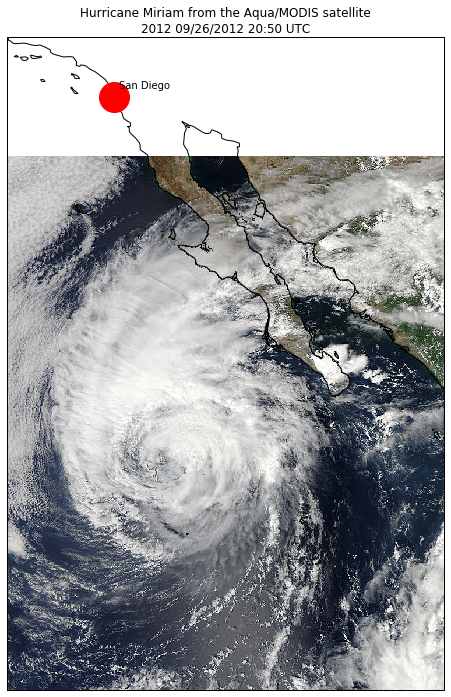

In [8]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=30, color='red', transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()

In [2]:
from osgeo import gdal, osr

gdal.UseExceptions()

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print('\n\n## ds ##:\n\n' + str(ds))
print('\n\n## data ##:\n\n' + str(data))
print('\n\n## gt ##:\n\n' + str(gt))
print('\n\n## proj ##:\n\n' + str(proj))
print('\n\n## inproj ##:\n\n' + str(inproj))



## ds ##:

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f93883c4510> >


## data ##:

[[[213 206 203 ...  92  83  81]
  [210 209 207 ... 110 104  98]
  [217 215 212 ... 134 141 153]
  ...
  [ 26  67  61 ... 217 218 218]
  [ 87  74  85 ... 213 214 216]
  [ 85  66  91 ... 212 214 218]]

 [[212 205 202 ...  80  71  70]
  [209 208 206 ... 102  96  90]
  [216 214 211 ... 128 135 147]
  ...
  [ 36  76  70 ... 216 217 217]
  [ 97  83  94 ... 212 213 215]
  [ 95  75 100 ... 211 213 217]]

 [[210 203 200 ...  58  45  40]
  [207 206 204 ...  83  75  67]
  [214 212 209 ... 114 121 133]
  ...
  [ 48  91  87 ... 212 213 213]
  [109  98 111 ... 208 209 211]
  [107  90 117 ... 207 209 213]]]


## gt ##:

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


## proj ##:




## inproj ##:


